In [9]:
import pyodbc
import json
import os
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib_venn import venn2,venn3
from sqlalchemy import create_engine
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
import plotly.express as px



In [10]:
server = 'localhost\\SQLEXPRESS'
database = 'prj0138'

conn_str = f"mssql+pyodbc://{server}/{database}?trusted_connection=yes&driver=SQL+Server"
engine = create_engine(conn_str)


In [11]:
education_df = pd.read_sql("""
-- Educational attainment by state for 2023
SELECT
    NAME AS state,
    S1501_C01_006E AS total_population_25plus,

    -- Educational attainment categories
    S1501_C01_007E AS less_than_high_school_25plus,
    S1501_C01_008E AS high_school_no_diploma_graduate_25plus,
    S1501_C01_009E AS high_school_25plus,
    S1501_C01_010E AS college_no_degree_25plus,
    S1501_C01_011E AS associate_degree_25plus,
    S1501_C01_012E AS bachelors_degree_25plus,
    S1501_C01_013E AS graduate_or_professional_degree_25plus,

    -- Age group 25 to 34
    S1501_C01_016E AS total_population_25_34,
    S1501_C01_017E AS high_school_25_34,
    S1501_C01_018E AS bachelors_degree_25_34,

    -- Age group 35 to 44
    S1501_C01_019E AS total_population_35_44,
    S1501_C01_020E AS high_school_35_44,
    S1501_C01_021E AS bachelors_degree_35_44,

    -- Age group 45 to 64
    S1501_C01_022E AS total_population_45_64,
    S1501_C01_023E AS high_school_45_64,
    S1501_C01_024E AS bachelors_degree_45_64,

    -- Age group 65 and over
    S1501_C01_025E AS total_population_65_plus,
    S1501_C01_026E AS high_school_65_plus,
    S1501_C01_027E AS bachelors_degree_65_plus

FROM [prj0138].[CUMC\shj4017].[Edu_Level_Survey]
WHERE Year = 2023
""", engine)


In [12]:
education_df

state  total_population_25plus  \
0                Alabama                  3498967   
1                 Alaska                   493892   
2                Arizona                  5150254   
3               Arkansas                  2078254   
4             California                 26969649   
5               Colorado                  4135123   
6            Connecticut                  2559922   
7               Delaware                   731427   
8   District of Columbia                   482919   
9                Florida                 16421870   
10               Georgia                  7448119   
11                Hawaii                  1024897   
12                 Idaho                  1305704   
13              Illinois                  8710996   
14               Indiana                  4614970   
15                  Iowa                  2166425   
16                Kansas                  1956252   
17              Kentucky                  3107275   
18             Louisiana                  3102893   
19                 Maine                  1039460   
20              Maryland                  4297439   
21         Massachusetts                  4975152   
22              Michigan                  7007856   
23             Minnesota                  3941575   
24           Mississippi                  1980147   
25              Missouri                  4255810   
26               Montana                   795845   
27              Nebraska                  1307246   
28                Nevada                  2253253   
29         New Hampshire                  1030965   
30            New Jersey                  6511081   
31            New Mexico                  1471057   
32              New York                 13885155   
33        North Carolina                  7487552   
34          North Dakota                   520006   
35                  Ohio                  8172692   
36              Oklahoma                  2684421   
37                Oregon                  3050675   
38          Pennsylvania                  9171006   
39          Rhode Island                   786493   
40        South Carolina                  3745394   
41          South Dakota                   615517   
42             Tennessee                  4931967   
43                 Texas                 20029447   
44                  Utah                  2085019   
45               Vermont                   471255   
46              Virginia                  6037339   
47            Washington                  5511197   
48         West Virginia                  1259219   
49             Wisconsin                  4116216   
50               Wyoming                   403853   
51           Puerto Rico                  2407254   

    less_than_high_school_25plus  high_school_no_diploma_graduate_25plus  \
0                       121630.0                                258272.0   
1                        11376.0                                 22085.0   
2                       238234.0                                308931.0   
3                        80265.0                                143133.0   
4                      2341160.0                               1753074.0   
5                       120666.0                                157178.0   
6                        94357.0                                116657.0   
7                        23995.0                                 39022.0   
8                        15862.0                                 19161.0   
9                       677352.0                                924156.0   
10                      317562.0                                476774.0   
11                       29345.0                                 42485.0   
12                       38851.0                                 63520.0   
13                      388438.0                                434550.0   
14                      166617.0                                27440

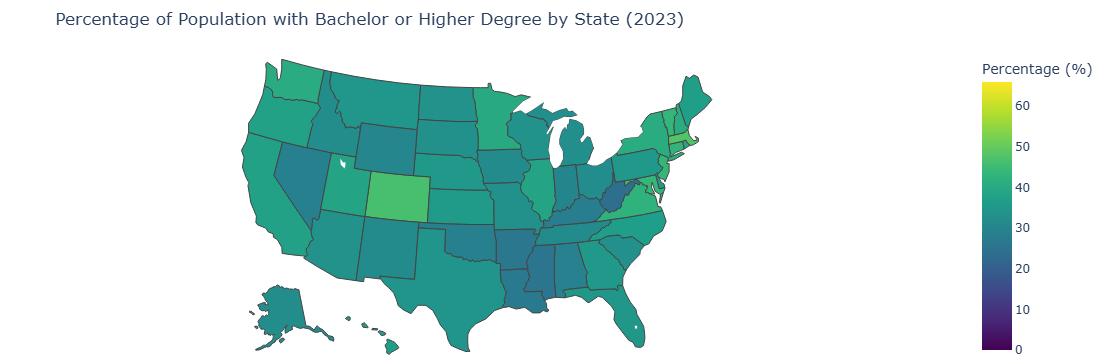

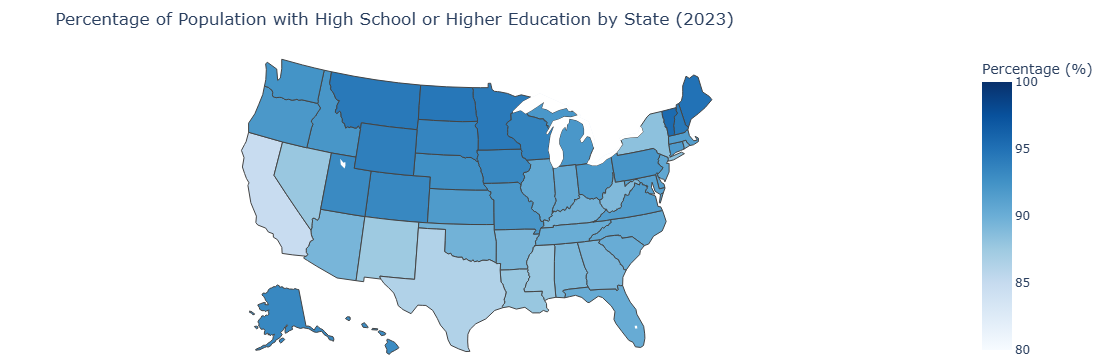

Top 5 States by Percentage of Population with Bachelor's or Higher Degree:
District of Columbia: 65.9%
Massachusetts: 47.8%
Colorado: 46.4%
New Jersey: 43.8%
Maryland: 43.7%

Bottom 5 States by Percentage of Population with Bachelor's or Higher Degree:
West Virginia: 24.0%
Mississippi: 25.5%
Arkansas: 26.2%
Louisiana: 27.0%
Kentucky: 27.8%


In [13]:
education_df = education_df.fillna(0)

education_df['bachelors_or_higher_pct'] = (education_df['bachelors_degree_25plus'] + 
                                          education_df['graduate_or_professional_degree_25plus']) / education_df['total_population_25plus'] * 100

education_df['high_school_or_higher_pct'] = (education_df['high_school_25plus'] + 
                                            education_df['college_no_degree_25plus'] + 
                                            education_df['associate_degree_25plus'] + 
                                            education_df['bachelors_degree_25plus'] + 
                                            education_df['graduate_or_professional_degree_25plus']) / education_df['total_population_25plus'] * 100

state_to_code = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO',
    'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
    'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH',
    'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
    'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY',
    'District of Columbia': 'DC', 'Puerto Rico': 'PR'
}

education_df['state'] = education_df['state'].apply(lambda x: x.replace('Puerto Rico Commonwealth', 'Puerto Rico')
                                                  .replace('District of Columbia', 'District of Columbia'))

education_df['state_code'] = education_df['state'].map(state_to_code)

fig1 = px.choropleth(
    education_df,
    locations='state_code',
    locationmode='USA-states',
    color='bachelors_or_higher_pct',
    scope="usa",
    color_continuous_scale="Viridis",
    range_color=[0, education_df['bachelors_or_higher_pct'].max()],
    labels={'bachelors_or_higher_pct': 'Bachelor or Higher Degree (%)'},
    title='Percentage of Population with Bachelor or Higher Degree by State (2023)'
)

fig1.update_layout(
    margin=dict(l=0, r=0, t=50, b=0),
    coloraxis_colorbar=dict(title="Percentage (%)"),
)


fig2 = px.choropleth(
    education_df,
    locations='state_code',
    locationmode='USA-states',
    color='high_school_or_higher_pct',
    scope="usa",
    color_continuous_scale="Blues",
    range_color=[80, 100], 
    labels={'high_school_or_higher_pct': 'High School or Higher Education (%)'},
    title='Percentage of Population with High School or Higher Education by State (2023)'
)

fig2.update_layout(
    margin=dict(l=0, r=0, t=50, b=0),
    coloraxis_colorbar=dict(title="Percentage (%)"),
)


fig1.show()
fig2.show()


top_education = education_df.sort_values('bachelors_or_higher_pct', ascending=False).head(5)
bottom_education = education_df.sort_values('bachelors_or_higher_pct', ascending=True).head(5)

print("Top 5 States by Percentage of Population with Bachelor's or Higher Degree:")
for idx, row in top_education.iterrows():
    print(f"{row['state']}: {row['bachelors_or_higher_pct']:.1f}%")

print("\nBottom 5 States by Percentage of Population with Bachelor's or Higher Degree:")
for idx, row in bottom_education.iterrows():
    print(f"{row['state']}: {row['bachelors_or_higher_pct']:.1f}%")

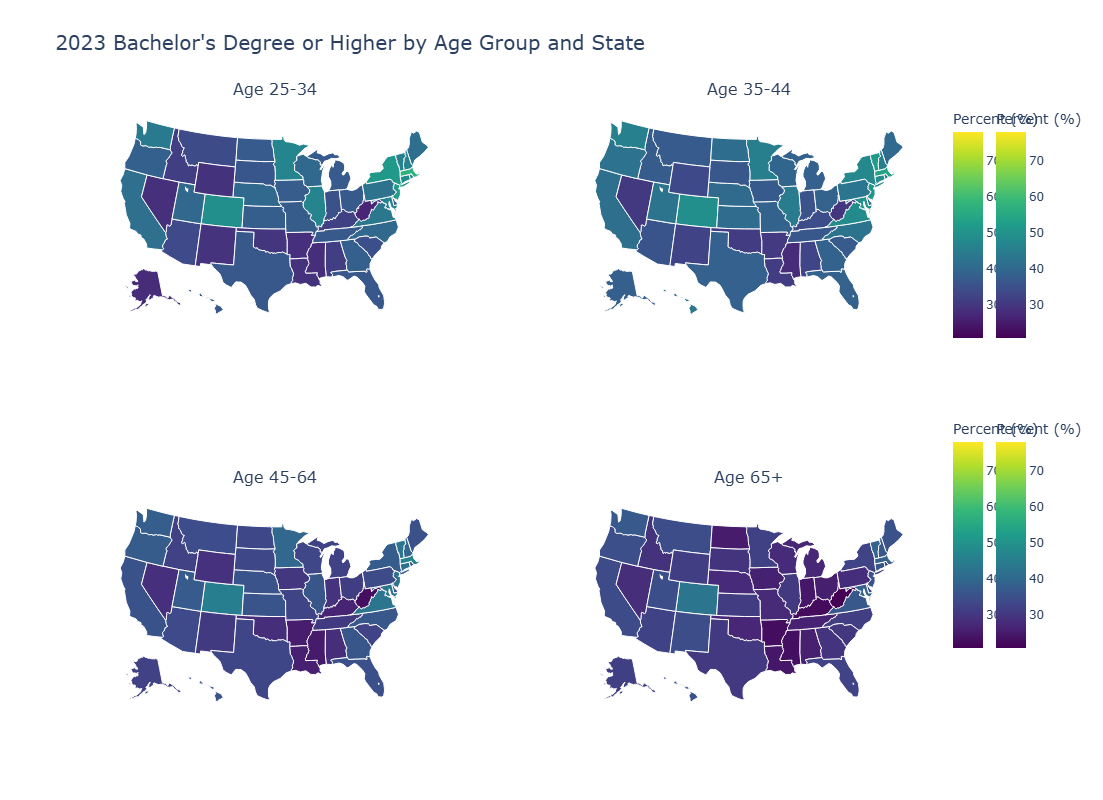

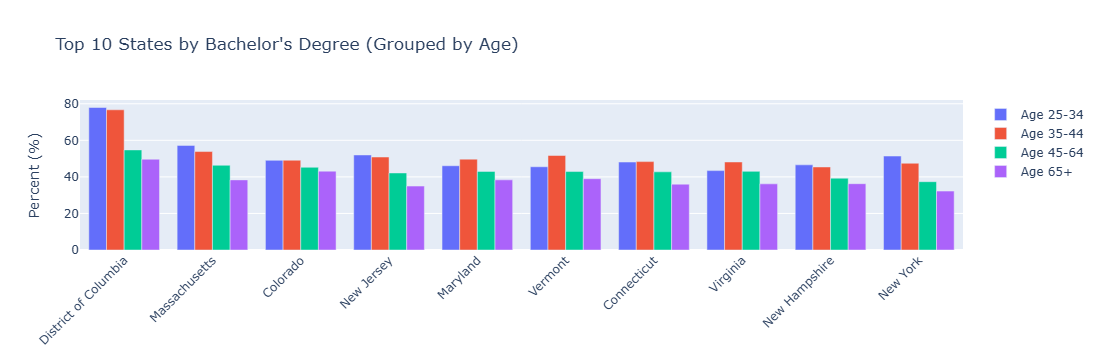

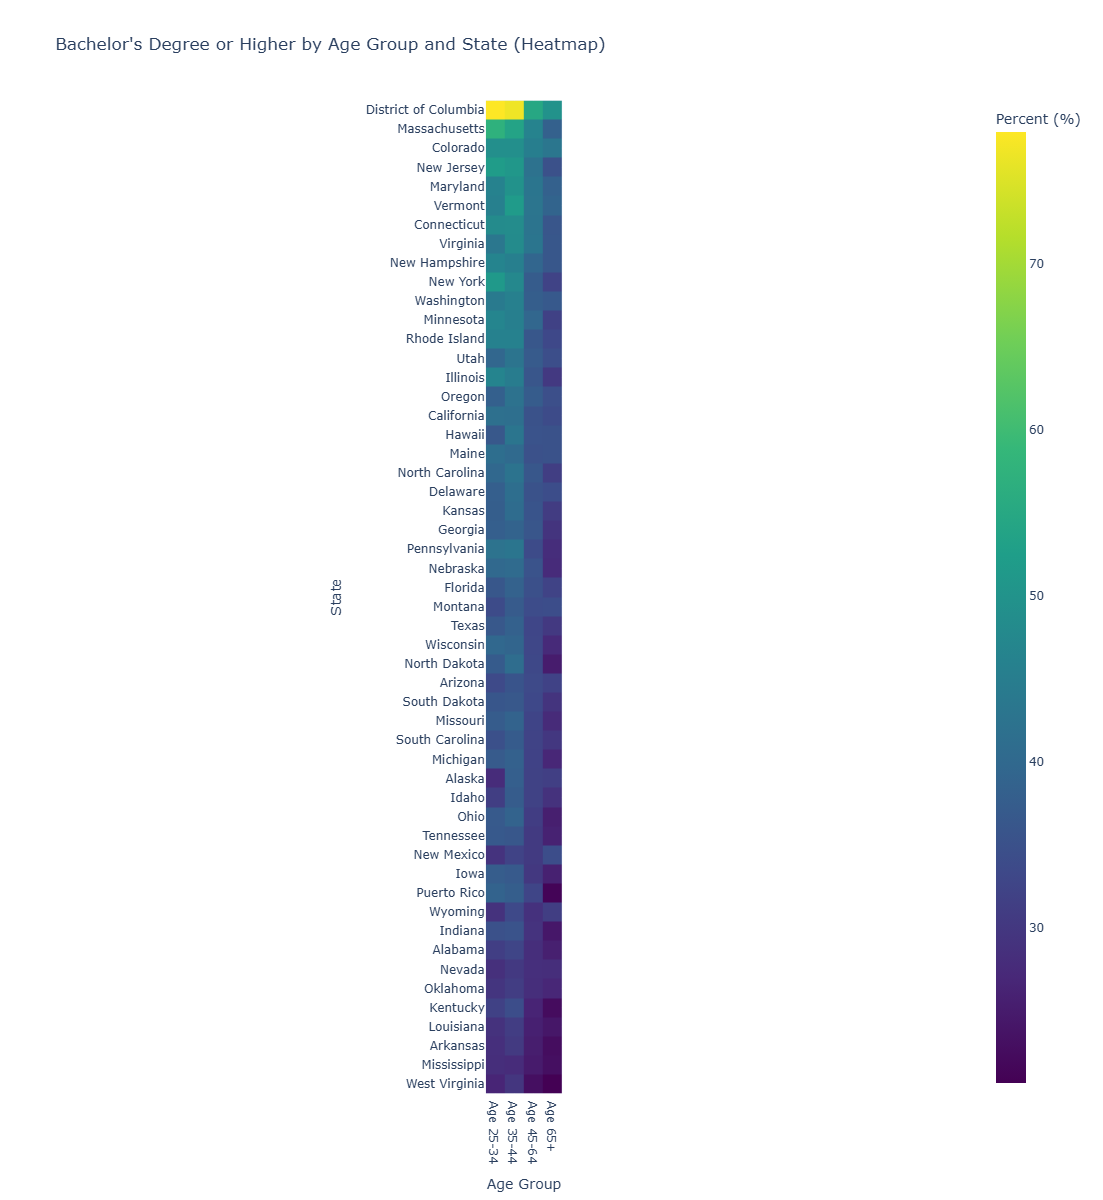

US Average Percentage of Bachelor's Degree or Higher by Age Group:
Age 25-34: 39.0%
Age 35-44: 40.6%
Age 45-64: 34.5%
Age 65+: 30.9%


In [14]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

# Calculate bachelor's or higher degree percentages by age group
education_df['bachelors_25_34_pct'] = education_df['bachelors_degree_25_34'] / education_df['total_population_25_34'] * 100
education_df['bachelors_35_44_pct'] = education_df['bachelors_degree_35_44'] / education_df['total_population_35_44'] * 100
education_df['bachelors_45_64_pct'] = education_df['bachelors_degree_45_64'] / education_df['total_population_45_64'] * 100
education_df['bachelors_65_plus_pct'] = education_df['bachelors_degree_65_plus'] / education_df['total_population_65_plus'] * 100

# Map state names to state codes
state_to_code = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO',
    'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
    'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH',
    'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
    'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY',
    'District of Columbia': 'DC', 'Puerto Rico': 'PR'
}

education_df['state_code'] = education_df['state'].map(state_to_code)

# Create 4-subplot choropleth maps for age groups
fig = make_subplots(
    rows=2, cols=2,
    specs=[[{"type": "choropleth"}, {"type": "choropleth"}],
           [{"type": "choropleth"}, {"type": "choropleth"}]],
    subplot_titles=("Age 25-34", "Age 35-44", "Age 45-64", "Age 65+")
)

# Unified color scale range
min_value = min(
    education_df['bachelors_25_34_pct'].min(),
    education_df['bachelors_35_44_pct'].min(),
    education_df['bachelors_45_64_pct'].min(),
    education_df['bachelors_65_plus_pct'].min()
)

max_value = max(
    education_df['bachelors_25_34_pct'].max(),
    education_df['bachelors_35_44_pct'].max(),
    education_df['bachelors_45_64_pct'].max(),
    education_df['bachelors_65_plus_pct'].max()
)

# Define a function to create a choropleth map trace
def add_map_trace(fig, row, col, z_data, title, colorbar_y, colorbar_x=1.0):
    fig.add_trace(
        go.Choropleth(
            locations=education_df['state_code'],
            z=z_data,
            locationmode='USA-states',
            colorscale='Viridis',
            zmin=min_value,
            zmax=max_value,
            marker_line_color='white',
            colorbar_title="Percent (%)",
            colorbar=dict(len=0.4, y=colorbar_y, x=colorbar_x),
            name=title,
            hovertemplate='%{location}: %{z:.1f}%<extra></extra>'
        ),
        row=row, col=col
    )

add_map_trace(fig, 1, 1, education_df['bachelors_25_34_pct'], 'Age 25-34', 0.8)
add_map_trace(fig, 1, 2, education_df['bachelors_35_44_pct'], 'Age 35-44', 0.3)
add_map_trace(fig, 2, 1, education_df['bachelors_45_64_pct'], 'Age 45-64', 0.8, 1.05)
add_map_trace(fig, 2, 2, education_df['bachelors_65_plus_pct'], 'Age 65+', 0.3, 1.05)

fig.update_layout(
    title_text="2023 Bachelor's Degree or Higher by Age Group and State",
    title_font_size=20,
    height=800,
    width=1000,
)

for r in [1, 2]:
    for c in [1, 2]:
        fig.update_geos(row=r, col=c, scope="usa", showlakes=True, lakecolor="white")

fig.show()

# Bar chart for top 10 states with highest bachelor's degree overall
top_states = education_df.sort_values('bachelors_or_higher_pct', ascending=False).head(10)

fig_bar = go.Figure()
fig_bar.add_trace(go.Bar(x=top_states['state'], y=top_states['bachelors_25_34_pct'], name='Age 25-34'))
fig_bar.add_trace(go.Bar(x=top_states['state'], y=top_states['bachelors_35_44_pct'], name='Age 35-44'))
fig_bar.add_trace(go.Bar(x=top_states['state'], y=top_states['bachelors_45_64_pct'], name='Age 45-64'))
fig_bar.add_trace(go.Bar(x=top_states['state'], y=top_states['bachelors_65_plus_pct'], name='Age 65+'))

fig_bar.update_layout(
    title='Top 10 States by Bachelor\'s Degree (Grouped by Age)',
    xaxis_tickangle=-45,
    barmode='group',
    yaxis_title='Percent (%)',
)

fig_bar.show()

# Heatmap showing all states and age groups
age_group_data = education_df[['state', 'bachelors_25_34_pct', 'bachelors_35_44_pct', 'bachelors_45_64_pct', 'bachelors_65_plus_pct']]
sorted_states = education_df.sort_values('bachelors_or_higher_pct', ascending=False)['state'].tolist()
age_group_data = age_group_data.set_index('state').reindex(sorted_states).reset_index()

fig_heatmap = px.imshow(
    age_group_data.set_index('state'),
    labels=dict(x="Age Group", y="State", color="Percent (%)"),
    x=['Age 25-34', 'Age 35-44', 'Age 45-64', 'Age 65+'],
    y=age_group_data['state'],
    color_continuous_scale="Viridis",
    title="Bachelor's Degree or Higher by Age Group and State (Heatmap)"
)
fig_heatmap.update_layout(height=1200)
fig_heatmap.show()

# Print US national average by age group
us_avg = {
    'Age 25-34': education_df['bachelors_25_34_pct'].mean(),
    'Age 35-44': education_df['bachelors_35_44_pct'].mean(),
    'Age 45-64': education_df['bachelors_45_64_pct'].mean(),
    'Age 65+': education_df['bachelors_65_plus_pct'].mean()
}

print("US Average Percentage of Bachelor's Degree or Higher by Age Group:")
for age, avg in us_avg.items():
    print(f"{age}: {avg:.1f}%")

# Find the state with the highest percentage for each age group
highest_states = {
    'Age 25-34': education_df.loc[education_df['bachelors_25_34_pct'].idxmax()]['state'],
    'Age 35-44': education_df.loc[education_df['bachelors_35_44_pct'].idxmax()]['state'],
    'Age 45-64': education_df.loc[education_df['bachelors_45_64_pct'].idxmax()]['state'],
    'Age 65+': education_df.loc[education_df['bachelors_65_plus_pct'].idxmax()]['state']
}




In [15]:
crimes_df = pd.read_sql("""

SELECT
    [State] AS state,
    [Population Covered] AS total_population,
    [Total Persons Offenses] AS total_persons_offenses,
    [Total Property Offenses] AS total_property_offenses,
    [Total Society Offenses] AS total_society_offenses

FROM [prj0138].[CUMC\shj4017].[crimes_Against_offenses]
WHERE [Year] = 2023;
""", engine)


In [16]:
crimes_df

state total_population  total_persons_offenses  \
0                Alabama          4715066                   78833   
1                 Alaska           443171                    7159   
2                Arizona          4649268                   62815   
3               Arkansas          2981249                   63300   
4             California         25009663                  282970   
5               Colorado          5822451                   71838   
6            Connecticut          3617176                   30243   
7               Delaware          1031890                   16993   
8   District of Columbia           678972                   23914   
9                Florida          9583627                  111118   
10               Georgia         10098610                  132910   
11                Hawaii          1270885                   11049   
12                 Idaho          1957679                   18680   
13              Illinois         11210798                  190931   
14               Indiana          5854222                   84386   
15                  Iowa          2998687                   34325   
16                Kansas          2705648                   48974   
17              Kentucky          4524497                   50699   
18             Louisiana          3423421                   60043   
19                 Maine          1395722                   13354   
20              Maryland          5986435                   77519   
21         Massachusetts          6971044                   75555   
22              Michigan          9517887                  164927   
23             Minnesota          5732979                   49362   
24           Mississippi          1711605                   20088   
25              Missouri          6100091                   88795   
26               Montana          1131954                   15976   
27              Nebraska          1902679                   20183   
28                Nevada          3181298                   64727   
29         New Hampshire          1361616                   13850   
30            New Jersey          6291305                   54222   
31            New Mexico          1885968                   41726   
32              New York         13603665                  285051   
33        North Carolina         10421456                  147915   
34          North Dakota           783926                   12884   
35                  Ohio         11239743                  159960   
36              Oklahoma          4053824                   68463   
37                Oregon          4175772                   42922   
38          Pennsylvania          5502689                   72843   
39          Rhode Island          1094548                    9826   
40        South Carolina          5363912                   98129   
41          South Dakota           844189                   13968   
42             Tennessee          7121949                  148027   
43                 Texas         30161963                  466350   
44                  Utah          3399787                   41025   
45               Vermont           647464                    4103   
46              Virginia          8715117                  115370   
47            Washington          7758180                   89723   
48         West Virginia          1555284                   16176   
49             Wisconsin          5743277                   50799   
50               Wyoming           515122                    6871   

    total_property_offenses  total_society_offenses  
0                    131304                   44159  
1                      9938                    2331  
2                    125876                   47898  
3                    109867                   34125  
4                    787673                  202757  
5                    263118                   40468  
6                     97740                   10283 

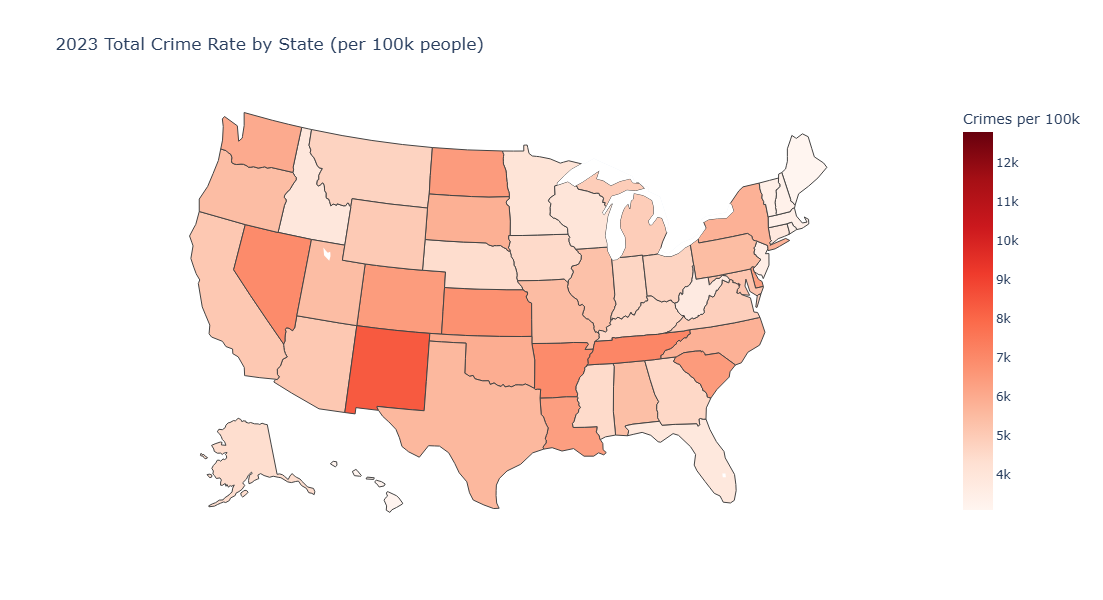

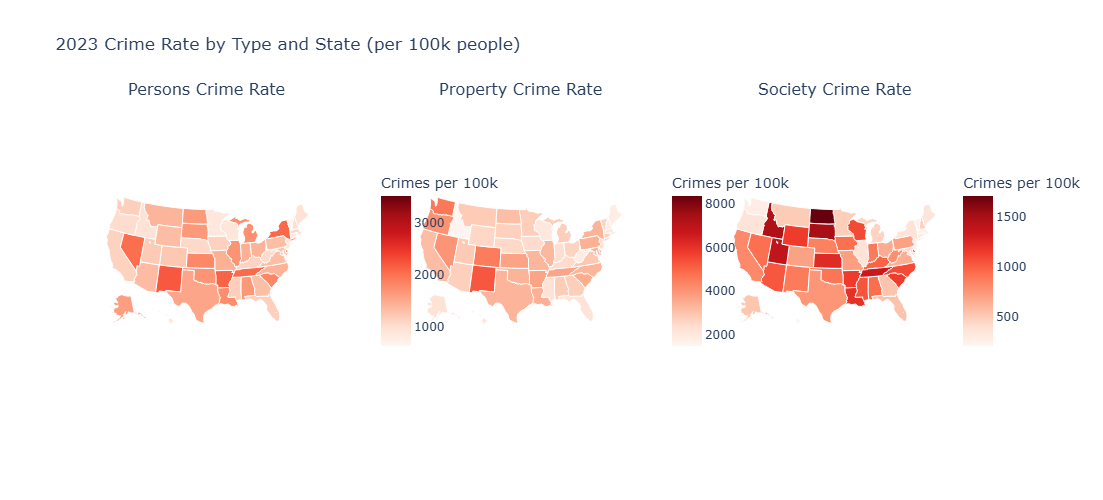

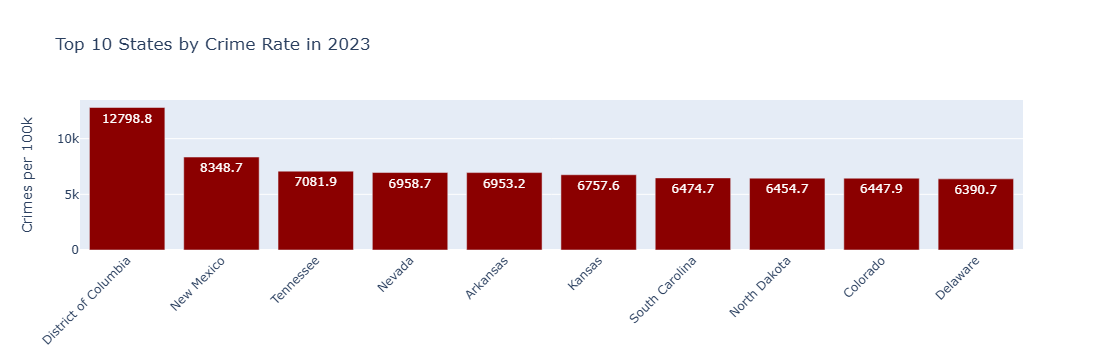

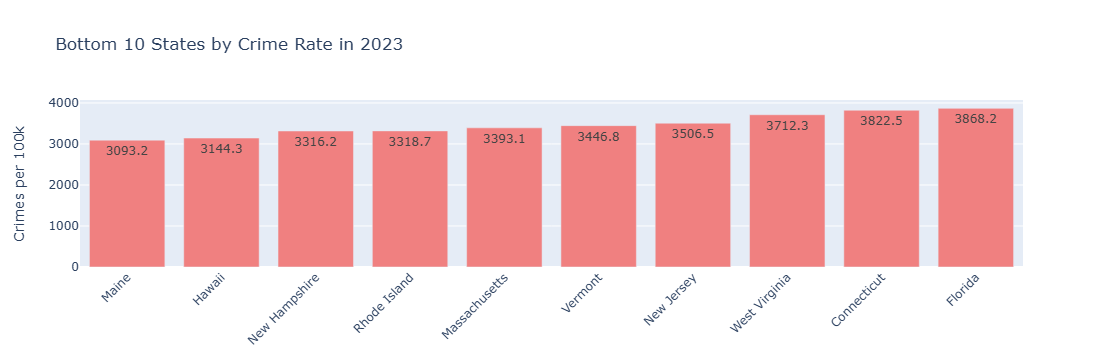

2023 US Crime Rate Summary:
National Average Crime Rate (per 100k): 5222.9
Highest Crime Rate (per 100k): 12798.8 (District of Columbia)
Lowest Crime Rate (per 100k): 3093.2 (Maine)

Crime Type Distribution:
Persons Crime Share: 27.1%
Property Crime Share: 59.1%
Society Crime Share: 13.7%


In [17]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

# Assume crimes_df has been loaded from a SQL query
crimes_df = crimes_df.fillna(0)

# Convert numeric columns from string to numeric type
numeric_cols = [
    'total_population',
    'total_persons_offenses',
    'total_property_offenses',
    'total_society_offenses'
]

for col in numeric_cols:
    crimes_df[col] = pd.to_numeric(crimes_df[col], errors='coerce')

# Calculate total crimes and crime rates per 100,000 population
crimes_df['total_crimes'] = (
    crimes_df['total_persons_offenses'] + 
    crimes_df['total_property_offenses'] + 
    crimes_df['total_society_offenses']
)

crimes_df['crime_rate'] = crimes_df['total_crimes'] / crimes_df['total_population'] * 100000
crimes_df['persons_crime_rate'] = crimes_df['total_persons_offenses'] / crimes_df['total_population'] * 100000
crimes_df['property_crime_rate'] = crimes_df['total_property_offenses'] / crimes_df['total_population'] * 100000
crimes_df['society_crime_rate'] = crimes_df['total_society_offenses'] / crimes_df['total_population'] * 100000

# State name to state code mapping
state_to_code = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO',
    'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
    'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH',
    'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
    'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY',
    'District of Columbia': 'DC', 'Puerto Rico': 'PR'
}

crimes_df['state_code'] = crimes_df['state'].map(state_to_code)

# Total crime rate choropleth
fig_total = px.choropleth(
    crimes_df,
    locations='state_code',
    color='crime_rate',
    locationmode='USA-states',
    scope='usa',
    color_continuous_scale='Reds',
    labels={'crime_rate': 'Crime rate per 100k'},
    title='2023 Total Crime Rate by State (per 100k people)',
    hover_data={
        'state': True,
        'crime_rate': ':.1f',
        'total_crimes': True,
        'total_population': True
    }
)

fig_total.update_layout(
    geo=dict(showlakes=True, lakecolor='rgb(255, 255, 255)'),
    coloraxis_colorbar=dict(title="Crimes per 100k"),
    height=600
)

# Subplots for crime types
fig_types = make_subplots(
    rows=1, cols=3,
    specs=[[{"type": "choropleth"}, {"type": "choropleth"}, {"type": "choropleth"}]],
    subplot_titles=("Persons Crime Rate", "Property Crime Rate", "Society Crime Rate")
)

fig_types.add_trace(
    go.Choropleth(
        locations=crimes_df['state_code'],
        z=crimes_df['persons_crime_rate'],
        locationmode='USA-states',
        colorscale='Reds',
        marker_line_color='white',
        colorbar_title="Crimes per 100k",
        colorbar=dict(len=0.6, x=0.33),
        hovertemplate='%{location}<br>Persons Crime Rate: %{z:.1f}<extra></extra>'
    ),
    row=1, col=1
)

fig_types.add_trace(
    go.Choropleth(
        locations=crimes_df['state_code'],
        z=crimes_df['property_crime_rate'],
        locationmode='USA-states',
        colorscale='Reds',
        marker_line_color='white',
        colorbar_title="Crimes per 100k",
        colorbar=dict(len=0.6, x=0.66),
        hovertemplate='%{location}<br>Property Crime Rate: %{z:.1f}<extra></extra>'
    ),
    row=1, col=2
)

fig_types.add_trace(
    go.Choropleth(
        locations=crimes_df['state_code'],
        z=crimes_df['society_crime_rate'],
        locationmode='USA-states',
        colorscale='Reds',
        marker_line_color='white',
        colorbar_title="Crimes per 100k",
        colorbar=dict(len=0.6, x=0.99),
        hovertemplate='%{location}<br>Society Crime Rate: %{z:.1f}<extra></extra>'
    ),
    row=1, col=3
)

fig_types.update_layout(
    title_text="2023 Crime Rate by Type and State (per 100k people)",
    height=500,
    width=1200
)

fig_types.update_geos(scope="usa", showlakes=True, lakecolor="rgb(255, 255, 255)")

# Top and bottom 10 states by crime rate
top_crime_states = crimes_df.sort_values('crime_rate', ascending=False).head(10)
bottom_crime_states = crimes_df.sort_values('crime_rate').head(10)

fig_bar = go.Figure()
fig_bar.add_trace(go.Bar(
    x=top_crime_states['state'],
    y=top_crime_states['crime_rate'],
    name='Top Crime Rate States',
    marker_color='darkred',
    text=top_crime_states['crime_rate'].round(1),
    textposition='auto'
))
fig_bar.update_layout(
    title='Top 10 States by Crime Rate in 2023',
    xaxis_tickangle=-45,
    yaxis=dict(title='Crimes per 100k'),
)

fig_bar_low = go.Figure()
fig_bar_low.add_trace(go.Bar(
    x=bottom_crime_states['state'],
    y=bottom_crime_states['crime_rate'],
    name='Lowest Crime Rate States',
    marker_color='lightcoral',
    text=bottom_crime_states['crime_rate'].round(1),
    textposition='auto'
))
fig_bar_low.update_layout(
    title='Bottom 10 States by Crime Rate in 2023',
    xaxis_tickangle=-45,
    yaxis=dict(title='Crimes per 100k'),
)

# Display all charts
fig_total.show()
fig_types.show()
fig_bar.show()
fig_bar_low.show()

# Print summary statistics
print("2023 US Crime Rate Summary:")
print(f"National Average Crime Rate (per 100k): {crimes_df['crime_rate'].mean():.1f}")
print(f"Highest Crime Rate (per 100k): {crimes_df['crime_rate'].max():.1f} ({crimes_df.loc[crimes_df['crime_rate'].idxmax(), 'state']})")
print(f"Lowest Crime Rate (per 100k): {crimes_df['crime_rate'].min():.1f} ({crimes_df.loc[crimes_df['crime_rate'].idxmin(), 'state']})")

print("\nCrime Type Distribution:")
print(f"Persons Crime Share: {(crimes_df['total_persons_offenses'].sum() / crimes_df['total_crimes'].sum() * 100):.1f}%")
print(f"Property Crime Share: {(crimes_df['total_property_offenses'].sum() / crimes_df['total_crimes'].sum() * 100):.1f}%")
print(f"Society Crime Share: {(crimes_df['total_society_offenses'].sum() / crimes_df['total_crimes'].sum() * 100):.1f}%")

In [18]:
final_mental_health_df = pd.read_sql("""
SELECT 
    state,
    SUM(num_Deaths) AS total_suicide,
    SUM(Population) AS total_population,
    ROUND(SUM(num_Deaths) * 100000.0 / SUM(population), 2) AS suicide_rate_per_100k
FROM [prj0138].[CUMC\shj4017].[mental_health_data]
WHERE [Year] = 2023
GROUP BY state
ORDER BY suicide_rate_per_100k DESC
""", engine)




In [19]:
final_mental_health_df

state  total_suicide  total_population  \
0                Wyoming           1585           1157606   
1                 Alaska           1930           1465346   
2                Montana           2764           2208542   
3             New Mexico           5032           4231754   
4               Colorado          12404          11624138   
5          West Virginia           3610           3565918   
6                  Idaho           3840           3801846   
7                 Nevada           6330           6287982   
8               Oklahoma           8012           7973278   
9                 Oregon           8341           8492310   
10                  Utah           6478           6675950   
11               Arizona          13620          14552632   
12              Arkansas           5643           6051782   
13                 Maine           2556           2744494   
14              Missouri          11450          12336374   
15         New Hampshire           2554           2777984   
16          South Dakota           1602           1790752   
17               Vermont           1144           1291140   
18                Kansas           5093           5869164   
19              Kentucky           7631           9018788   
20             Tennessee          11713          13950436   
21          North Dakota           1289           1549896   
22        South Carolina           8345          10381410   
23               Alabama           8010          10079754   
24            Washington          12292          15477384   
25               Indiana          10346          13611970   
26               Florida          32991          43562256   
27                  Iowa           4802           6386158   
28             Louisiana           6872           9248094   
29             Wisconsin           8734          11791816   
30                  Ohio          17441          23560034   
31          Pennsylvania          19173          25928112   
32              Michigan          14525          20101622   
33           Mississippi           4063           5899930   
34               Georgia          14777          21599132   
35                Hawaii           1968           2883106   
36        North Carolina          14325          21102324   
37              Virginia          11732          17284548   
38             Minnesota           7568          11414780   
39              Nebraska           2502           3927384   
40                 Texas          37615          59055882   
41              Delaware           1158           2006768   
42              Illinois          14229          25342938   
43           Connecticut           4036           7211194   
44            California          43240          78475672   
45          Rhode Island           1156           2191220   
46              Maryland           6214          12330258   
47         Massachusetts           6620          13969446   
48              New York          16864          39671826   
49            New Jersey           7398          18534260   
50  District of Columbia            446           1340100   

    suicide_rate_per_100k  
0                  136.92  
1                  131.71  
2                  125.15  
3                  118.91  
4                  106.71  
5                  101.24  
6                  101.00  
7                  100.67  
8                  100.49  
9                   98.22  
10                  97.03  
11                  93.59  
12                  93.25  
13                  93.13  
14                  92.81  
15                  91.94  
16                  89.46  
17                  88.60  
18                  86.78  
19                  84.61  
20                  83.96  
21                  83.17  
22                  80.38  
23                  79.47  
24                  79.42  
25                  76.01  
26                  75.73  
27                  75.19  
28                  74.31  
29    

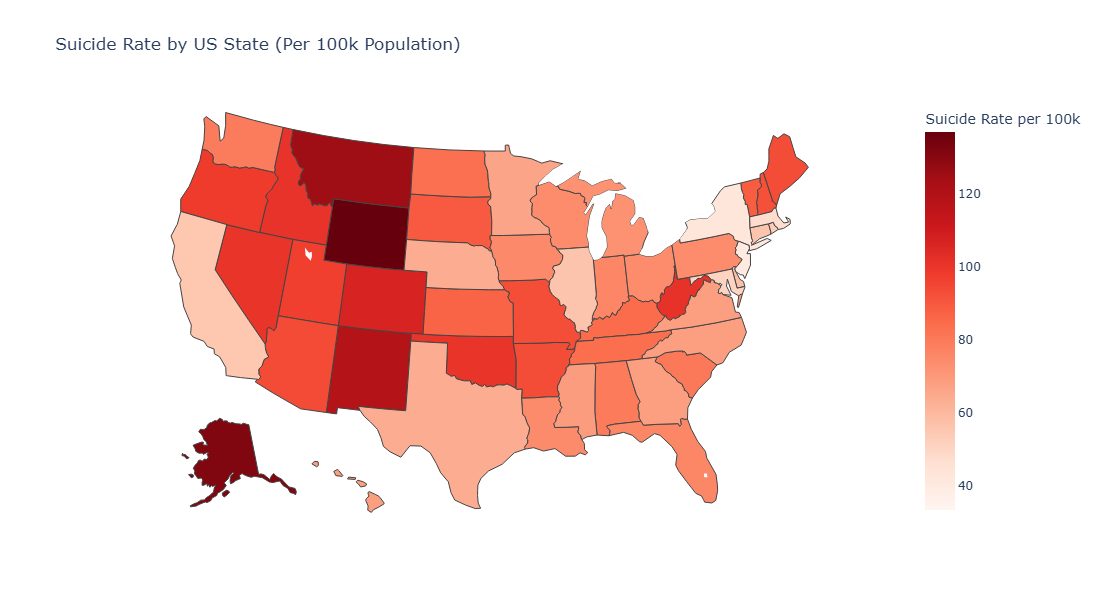

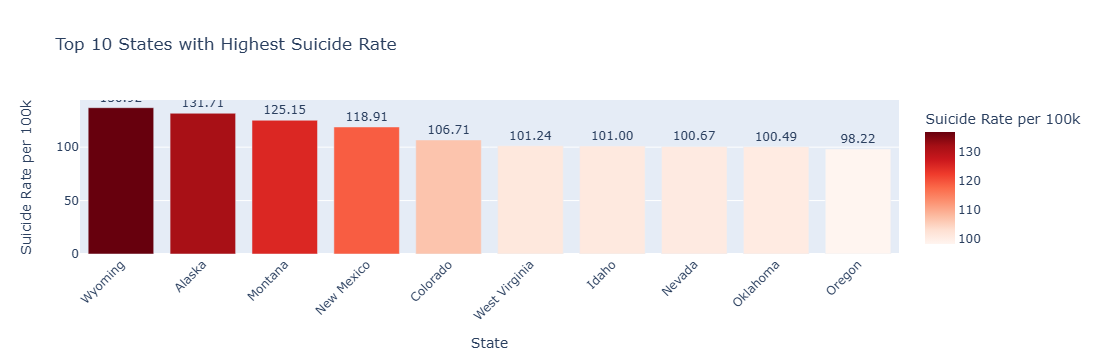

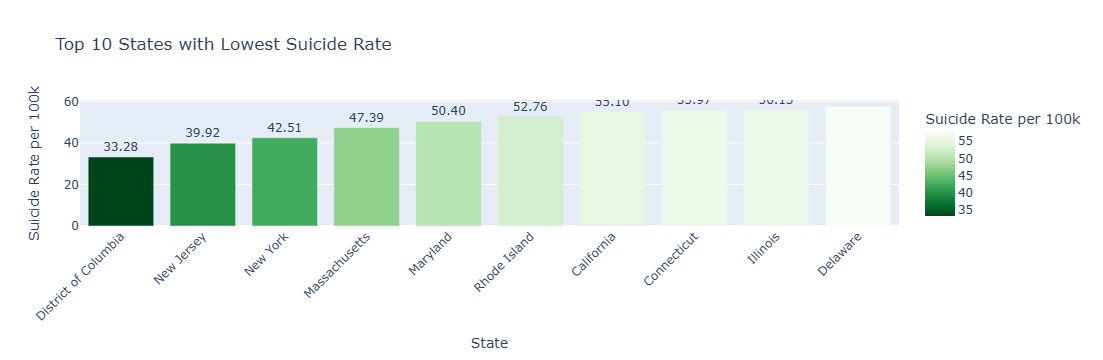

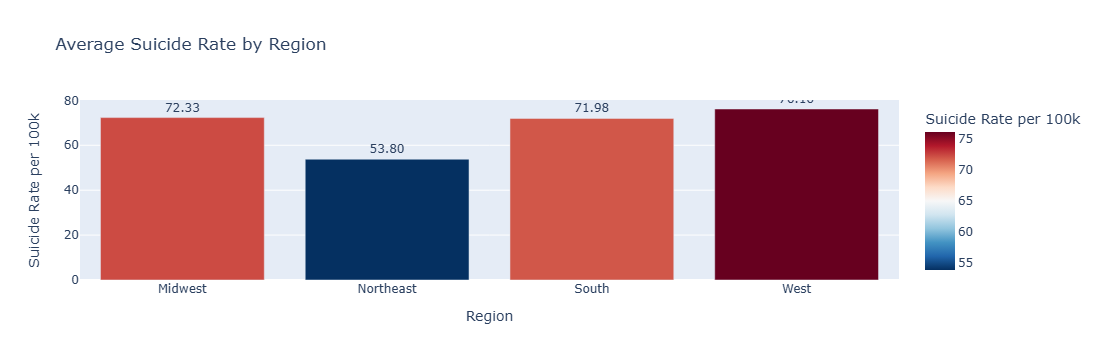

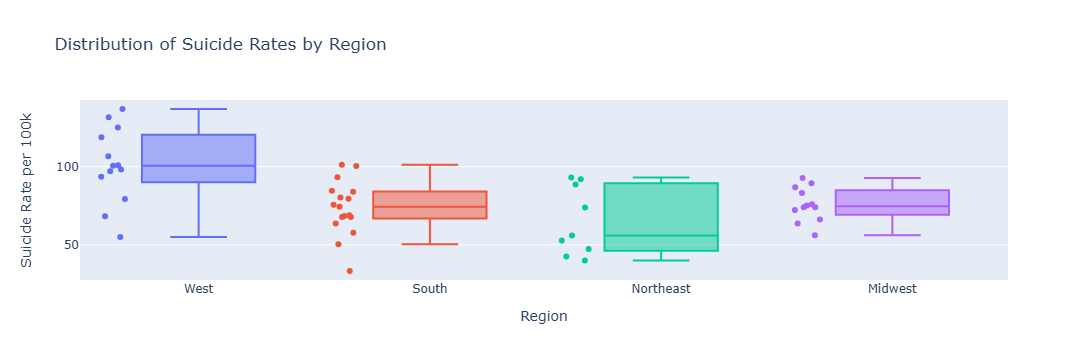

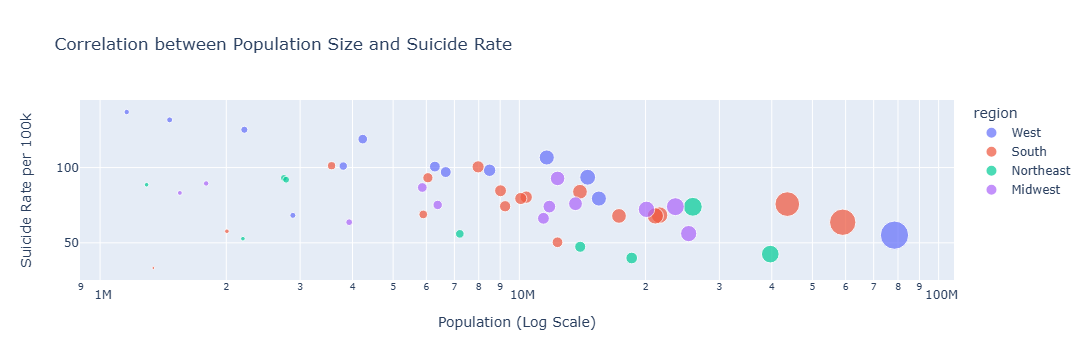

U.S. Suicide Rate Summary:
National suicide rate (per 100k): 69.91
Highest suicide rate: Wyoming (136.92)
Lowest suicide rate: District of Columbia (33.28)
Median suicide rate across states: 76.01
Average suicide rate across states: 79.61

Regional Suicide Rate Summary:
Midwest: 72.33 per 100k people
Northeast: 53.8 per 100k people
South: 71.98 per 100k people
West: 76.16 per 100k people


In [20]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
from plotly.subplots import make_subplots

state_summary = final_mental_health_df.rename(columns={
    'total_suicide': 'number_of_suicide',
    'total_population': 'population'
})

# Assuming state_summary has been created already
# Add state codes for US map plotting
state_to_code = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO',
    'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
    'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH',
    'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
    'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY',
    'District of Columbia': 'DC', 'Puerto Rico': 'PR'
}

# Map state codes
state_summary['state_code'] = state_summary['state'].map(state_to_code)

# Choropleth map of suicide rate
fig_map = px.choropleth(
    state_summary,
    locations='state_code',
    locationmode='USA-states',
    color='suicide_rate_per_100k',
    scope='usa',
    color_continuous_scale='Reds',
    range_color=[state_summary['suicide_rate_per_100k'].min(), 
                state_summary['suicide_rate_per_100k'].max()],
    title='Suicide Rate by US State (Per 100k Population)',
    labels={'suicide_rate_per_100k': 'Suicide Rate per 100k'},
    hover_data={
        'state': True,
        'suicide_rate_per_100k': ':.2f',
        'number_of_suicide': ':,',
        'population': ':,'
    }
)

fig_map.update_layout(
    geo=dict(
        showlakes=True,
        lakecolor='rgb(255, 255, 255)'
    ),
    coloraxis_colorbar=dict(
        title="Suicide Rate per 100k"
    ),
    height=600
)

# Bar chart for top 10 states with highest suicide rate
top_suicide_states = state_summary.sort_values('suicide_rate_per_100k', ascending=False).head(10)

fig_bar = px.bar(
    top_suicide_states,
    x='state',
    y='suicide_rate_per_100k',
    title='Top 10 States with Highest Suicide Rate',
    labels={'state': 'State', 'suicide_rate_per_100k': 'Suicide Rate per 100k'},
    color='suicide_rate_per_100k',
    color_continuous_scale='Reds',
    text='suicide_rate_per_100k'
)

fig_bar.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig_bar.update_layout(xaxis_tickangle=-45)

# Bar chart for bottom 10 states with lowest suicide rate
bottom_suicide_states = state_summary.sort_values('suicide_rate_per_100k').head(10)

fig_bar_low = px.bar(
    bottom_suicide_states,
    x='state',
    y='suicide_rate_per_100k',
    title='Top 10 States with Lowest Suicide Rate',
    labels={'state': 'State', 'suicide_rate_per_100k': 'Suicide Rate per 100k'},
    color='suicide_rate_per_100k',
    color_continuous_scale='Greens_r',
    text='suicide_rate_per_100k'
)

fig_bar_low.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig_bar_low.update_layout(xaxis_tickangle=-45)

# Define US regions
regions = {
    'Northeast': ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont', 
                  'New Jersey', 'New York', 'Pennsylvania'],
    'Midwest': ['Illinois', 'Indiana', 'Michigan', 'Ohio', 'Wisconsin', 'Iowa', 'Kansas', 
                'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'South Dakota'],
    'South': ['Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 
              'Virginia', 'District of Columbia', 'West Virginia', 'Alabama', 'Kentucky', 
              'Mississippi', 'Tennessee', 'Arkansas', 'Louisiana', 'Oklahoma', 'Texas'],
    'West': ['Arizona', 'Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Utah', 'Wyoming', 
             'Alaska', 'California', 'Hawaii', 'Oregon', 'Washington']
}

# Assign region to each state
def assign_region(state):
    for region, states in regions.items():
        if state in states:
            return region
    return "Unknown"

state_summary['region'] = state_summary['state'].apply(assign_region)

# Region-level summary
region_summary = state_summary.groupby('region').agg({
    'number_of_suicide': 'sum',
    'population': 'sum'
}).reset_index()

region_summary['suicide_rate_per_100k'] = (
    region_summary['number_of_suicide'] / region_summary['population'] * 100000
).round(2)

# Bar chart of average suicide rate by region
fig_region = px.bar(
    region_summary,
    x='region',
    y='suicide_rate_per_100k',
    title='Average Suicide Rate by Region',
    labels={'region': 'Region', 'suicide_rate_per_100k': 'Suicide Rate per 100k'},
    color='suicide_rate_per_100k',
    color_continuous_scale='RdBu_r',
    text='suicide_rate_per_100k'
)

fig_region.update_traces(texttemplate='%{text:.2f}', textposition='outside')

# Box plot to compare suicide rate distribution across regions
fig_box = px.box(
    state_summary, 
    x='region', 
    y='suicide_rate_per_100k',
    title='Distribution of Suicide Rates by Region',
    labels={'region': 'Region', 'suicide_rate_per_100k': 'Suicide Rate per 100k'},
    color='region',
    points='all'
)

fig_box.update_layout(showlegend=False)

# Correlation analysis: population vs suicide rate
fig_scatter = px.scatter(
    state_summary,
    x='population',
    y='suicide_rate_per_100k',
    title='Correlation between Population Size and Suicide Rate',
    labels={'population': 'Population', 'suicide_rate_per_100k': 'Suicide Rate per 100k'},
    hover_name='state',
    size='number_of_suicide',
    color='region',
    log_x=True
)

fig_scatter.update_layout(
    xaxis_title='Population (Log Scale)',
    yaxis_title='Suicide Rate per 100k'
)

# Statistical summary
national_suicide_rate = (state_summary['number_of_suicide'].sum() / state_summary['population'].sum() * 100000).round(2)
highest_rate = state_summary.loc[state_summary['suicide_rate_per_100k'].idxmax()]
lowest_rate = state_summary.loc[state_summary['suicide_rate_per_100k'].idxmin()]
median_rate = state_summary['suicide_rate_per_100k'].median()
avg_rate = state_summary['suicide_rate_per_100k'].mean()

# Show all plots
fig_map.show()
fig_bar.show()
fig_bar_low.show()
fig_region.show()
fig_box.show()
fig_scatter.show()

# Print summary stats
print("U.S. Suicide Rate Summary:")
print(f"National suicide rate (per 100k): {national_suicide_rate}")
print(f"Highest suicide rate: {highest_rate['state']} ({highest_rate['suicide_rate_per_100k']})")
print(f"Lowest suicide rate: {lowest_rate['state']} ({lowest_rate['suicide_rate_per_100k']})")
print(f"Median suicide rate across states: {median_rate}")
print(f"Average suicide rate across states: {avg_rate:.2f}")

print("\nRegional Suicide Rate Summary:")
for index, row in region_summary.iterrows():
    print(f"{row['region']}: {row['suicide_rate_per_100k']} per 100k people")


In [21]:
# Step 1: Prepare the data

# Create education metrics
# Calculate percentage of population with bachelor's degree or higher
education_df['pct_bachelors_or_higher'] = ((education_df['bachelors_degree_25plus'] + 
                                           education_df['graduate_or_professional_degree_25plus']) / 
                                          education_df['total_population_25plus'] * 100).round(2)

# Calculate high school graduation rate
education_df['pct_high_school_grad'] = (education_df['high_school_25plus'] / 
                                       education_df['total_population_25plus'] * 100).round(2)

# Create crime rate metrics
crimes_df['total_crimes'] = (crimes_df['total_persons_offenses'] + 
                            crimes_df['total_property_offenses'] + 
                            crimes_df['total_society_offenses'])
crimes_df['crime_rate_per_100k'] = (crimes_df['total_crimes'] / 
                                   crimes_df['total_population'] * 100000).round(2)

# We already have suicide_rate_per_100k from your code
# Let's assume state_summary has the suicide data

# Merge all datasets by state
merged_df = education_df.merge(crimes_df, on='state', how='inner')
merged_df = merged_df.merge(state_summary[['state', 'suicide_rate_per_100k']], on='state', how='inner')

# Step 2: Exploratory Data Analysis

# Calculate descriptive statistics
descriptive_stats = merged_df[['crime_rate_per_100k', 'suicide_rate_per_100k', 
                             'pct_bachelors_or_higher']].describe()

# Calculate correlation matrix
correlation_matrix = merged_df[['crime_rate_per_100k', 'suicide_rate_per_100k', 
                              'pct_bachelors_or_higher', 'pct_high_school_grad']].corr()

# Step 3: Regression Analysis

# First model: Crime rate predicting suicide rate
model1 = smf.ols('suicide_rate_per_100k ~ crime_rate_per_100k', data=merged_df).fit()

# Second model: Crime rate and education predicting suicide rate
model2 = smf.ols('suicide_rate_per_100k ~ crime_rate_per_100k + pct_bachelors_or_higher', 
                data=merged_df).fit()

# Third model: Crime rate, education, and their interaction predicting suicide rate
# Center the variables for better interpretation of interaction effects
merged_df['crime_centered'] = merged_df['crime_rate_per_100k'] - merged_df['crime_rate_per_100k'].mean()
merged_df['education_centered'] = merged_df['pct_bachelors_or_higher'] - merged_df['pct_bachelors_or_higher'].mean()
merged_df['crime_x_education'] = merged_df['crime_centered'] * merged_df['education_centered']

model3 = smf.ols('suicide_rate_per_100k ~ crime_centered + education_centered + crime_x_education', 
                data=merged_df).fit()

# Step 5: Simple slopes analysis
# Create high (+1 SD) and low (-1 SD) education values
ed_mean = merged_df['pct_bachelors_or_higher'].mean()
ed_sd = merged_df['pct_bachelors_or_higher'].std()

# Effect of crime on suicide at high education level (+1 SD)
high_ed_effect = model3.params['crime_centered'] + model3.params['crime_x_education'] * ed_sd
high_ed_pvalue = model3.t_test('crime_centered + crime_x_education * {}'.format(ed_sd)).pvalue

# Effect of crime on suicide at low education level (-1 SD)
low_ed_effect = model3.params['crime_centered'] + model3.params['crime_x_education'] * (-ed_sd)
low_ed_pvalue = model3.t_test('crime_centered + crime_x_education * {}'.format(-ed_sd)).pvalue

# Step 6: Summarize results
results_summary = {
    'Model 1 (Crime Only)': {
        'R-squared': model1.rsquared,
        'p-value': model1.f_pvalue,
        'Crime coefficient': model1.params['crime_rate_per_100k'],
        'Crime p-value': model1.pvalues['crime_rate_per_100k']
    },
    'Model 2 (Crime + Education)': {
        'R-squared': model2.rsquared,
        'p-value': model2.f_pvalue,
        'Crime coefficient': model2.params['crime_rate_per_100k'],
        'Crime p-value': model2.pvalues['crime_rate_per_100k'],
        'Education coefficient': model2.params['pct_bachelors_or_higher'],
        'Education p-value': model2.pvalues['pct_bachelors_or_higher']
    },
    'Model 3 (Interaction)': {
        'R-squared': model3.rsquared,
        'p-value': model3.f_pvalue,
        'Crime coefficient': model3.params['crime_centered'],
        'Crime p-value': model3.pvalues['crime_centered'],
        'Education coefficient': model3.params['education_centered'],
        'Education p-value': model3.pvalues['education_centered'],
        'Interaction coefficient': model3.params['crime_x_education'],
        'Interaction p-value': model3.pvalues['crime_x_education']
    },
    'Simple Slopes Analysis': {
        'Effect at High Education (+1 SD)': high_ed_effect,
        'p-value at High Education': high_ed_pvalue,
        'Effect at Low Education (-1 SD)': low_ed_effect,
        'p-value at Low Education': low_ed_pvalue
    }
}

# Display results
print("Descriptive Statistics:")
print(descriptive_stats)
print("\nCorrelation Matrix:")
print(correlation_matrix)
print("\nModel Summaries:")
print("Model 1 (Crime Only):")
print(model1.summary())
print("\nModel 2 (Crime + Education):")
print(model2.summary())
print("\nModel 3 (Interaction):")
print(model3.summary())
print("\nSimple Slopes Analysis:")
print(f"Effect of crime on suicide at high education (+1 SD): {high_ed_effect:.4f}, p = {high_ed_pvalue:.4f}")
print(f"Effect of crime on suicide at low education (-1 SD): {low_ed_effect:.4f}, p = {low_ed_pvalue:.4f}") 

Descriptive Statistics:
       crime_rate_per_100k  suicide_rate_per_100k  pct_bachelors_or_higher
count            51.000000              51.000000                51.000000
mean           5222.899412              79.614706                35.764706
std            1608.946141              22.554624                 6.926225
min            3093.170000              33.280000                23.990000
25%            4238.790000              67.090000                31.855000
50%            5088.740000              76.010000                34.920000
75%            5889.205000              93.190000                38.720000
max           12798.760000             136.920000                65.940000

Correlation Matrix:
                         crime_rate_per_100k  suicide_rate_per_100k  \
crime_rate_per_100k                 1.000000              -0.028321   
suicide_rate_per_100k              -0.028321               1.000000   
pct_bachelors_or_higher             0.254287              -0.494101

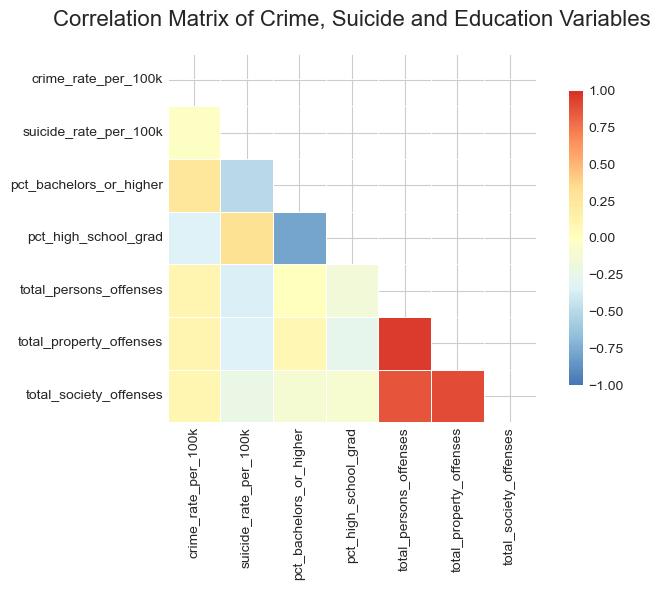

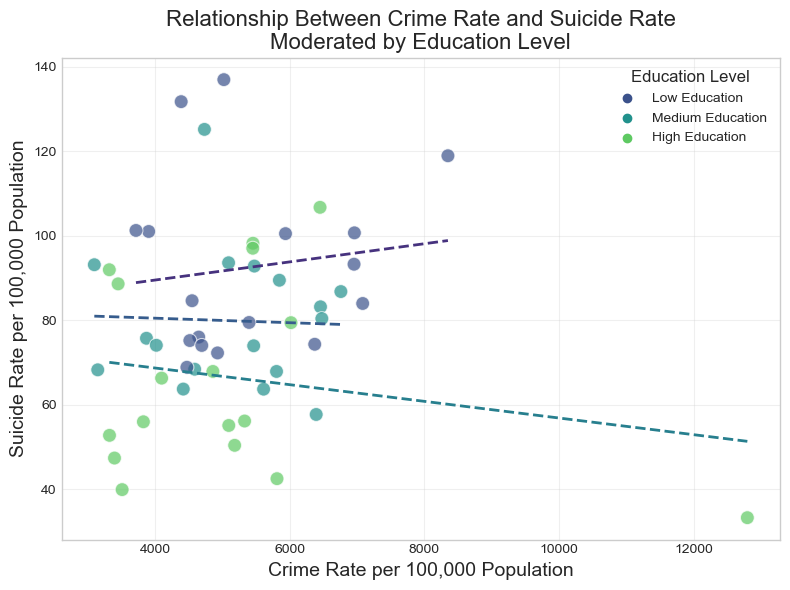

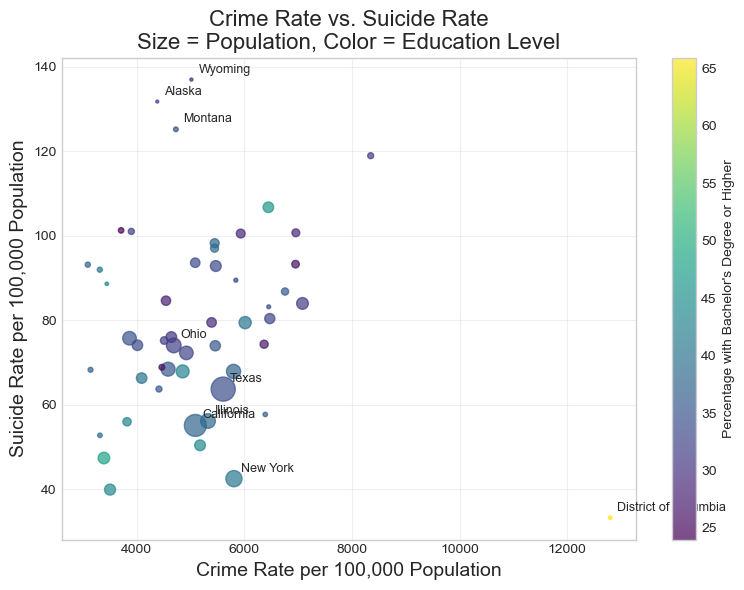

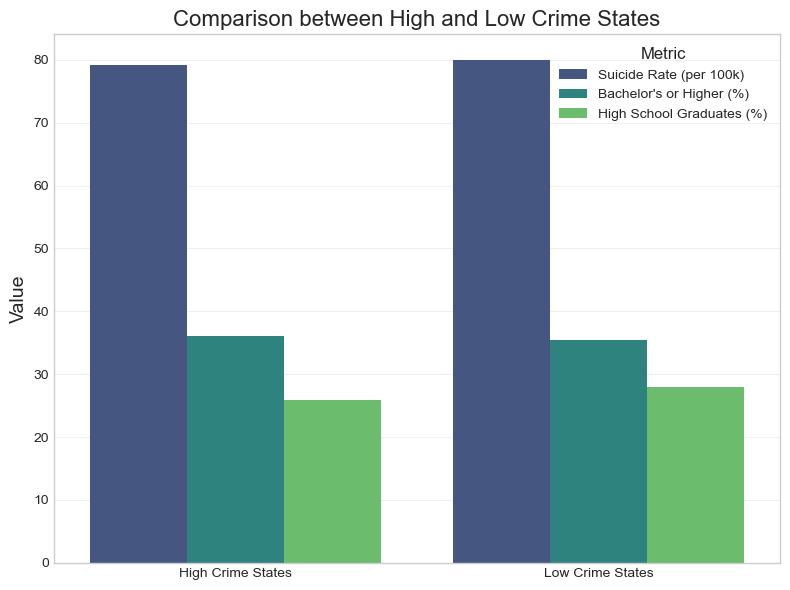

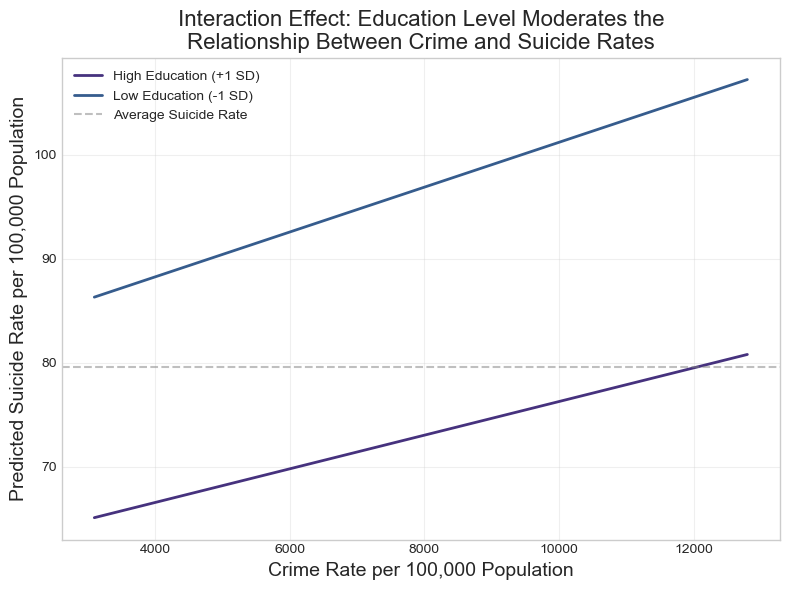

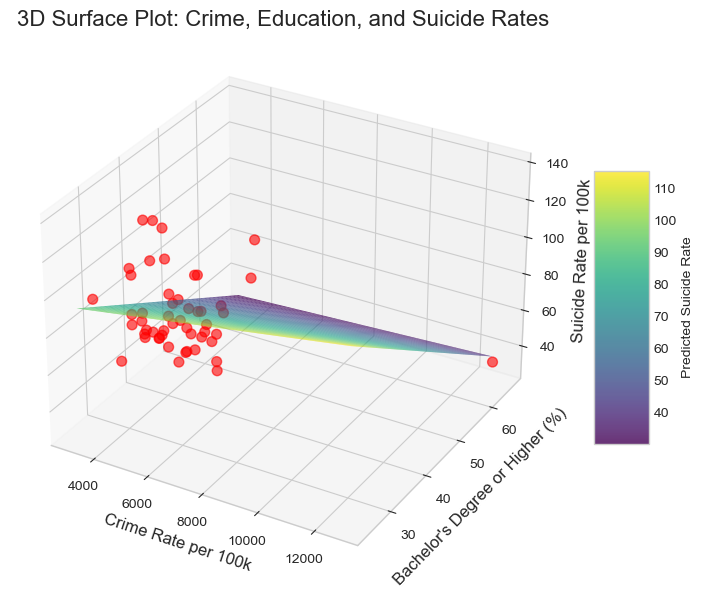

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
from scipy import stats

# Assuming merged_df is already created from previous code
# Let's create multiple visualizations

# Set the style for all plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')

# 1. Correlation Matrix Heatmap with Annotations
plt.figure(figsize=(8, 6))
# Define variables of interest
correlation_vars = ['crime_rate_per_100k', 'suicide_rate_per_100k', 
                    'pct_bachelors_or_higher', 'pct_high_school_grad',
                    'total_persons_offenses', 'total_property_offenses', 'total_society_offenses']

# Create correlation matrix
corr_matrix = merged_df[correlation_vars].corr()

# Create a custom colormap
colors = ["#4575b4", "#91bfdb", "#e0f3f8", "#ffffbf", "#fee090", "#fc8d59", "#d73027"]
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=256)

# Create the heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
heatmap = sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap=cmap,
                     mask=mask, vmin=-1, vmax=1, center=0,
                     square=True, linewidths=.5, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Crime, Suicide and Education Variables', fontsize=16, pad=20)
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# 2. Scatterplot with regression lines for different education levels
plt.figure(figsize=(8, 6))

# Create education level groups
merged_df['education_group'] = pd.qcut(merged_df['pct_bachelors_or_higher'], 
                                      q=3, 
                                      labels=['Low Education', 'Medium Education', 'High Education'])

# Plot with different colors for education groups
sns.scatterplot(data=merged_df, x='crime_rate_per_100k', y='suicide_rate_per_100k', 
               hue='education_group', palette='viridis', s=100, alpha=0.7)

# Add regression lines for each education group
for name, group in merged_df.groupby('education_group'):
    sns.regplot(x='crime_rate_per_100k', y='suicide_rate_per_100k', 
               data=group, scatter=False, ci=None, 
               line_kws={'linewidth': 2, 'linestyle': '--'})

plt.title('Relationship Between Crime Rate and Suicide Rate\nModerated by Education Level', fontsize=16)
plt.xlabel('Crime Rate per 100,000 Population', fontsize=14)
plt.ylabel('Suicide Rate per 100,000 Population', fontsize=14)
plt.legend(title='Education Level', title_fontsize=12, fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('education_moderation_scatterplot.png', dpi=300, bbox_inches='tight')
plt.show()

# 3. Bubble chart showing three variables
plt.figure(figsize=(8, 6))
# Use population as bubble size
size_var = merged_df['total_population'] / 100000  # Scale for better visibility

# Create scatter plot with size proportional to population
scatter = plt.scatter(merged_df['crime_rate_per_100k'], 
                      merged_df['suicide_rate_per_100k'], 
                      s=size_var, 
                      c=merged_df['pct_bachelors_or_higher'],
                      cmap='viridis', 
                      alpha=0.7)

# Add state labels for the largest states or outliers
top_population_states = merged_df.nlargest(5, 'total_population')
outlier_states = merged_df[(np.abs(stats.zscore(merged_df['suicide_rate_per_100k'])) > 2) | 
                           (np.abs(stats.zscore(merged_df['crime_rate_per_100k'])) > 2)]

states_to_label = pd.concat([top_population_states, outlier_states]).drop_duplicates()

for _, row in states_to_label.iterrows():
    plt.annotate(row['state'], 
                (row['crime_rate_per_100k'], row['suicide_rate_per_100k']),
                xytext=(5, 5), 
                textcoords='offset points',
                fontsize=9)

plt.colorbar(scatter, label='Percentage with Bachelor\'s Degree or Higher')
plt.title('Crime Rate vs. Suicide Rate\nSize = Population, Color = Education Level', fontsize=16)
plt.xlabel('Crime Rate per 100,000 Population', fontsize=14)
plt.ylabel('Suicide Rate per 100,000 Population', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('bubble_chart.png', dpi=300, bbox_inches='tight')
plt.show()

# 4. Grouped bar chart comparing high vs low crime states
plt.figure(figsize=(8, 6))

# Define high and low crime states based on median
median_crime = merged_df['crime_rate_per_100k'].median()
merged_df['crime_level'] = np.where(merged_df['crime_rate_per_100k'] >= median_crime, 
                                   'High Crime States', 'Low Crime States')

# Prepare data for grouped bar chart
grouped_data = merged_df.groupby('crime_level').agg({
    'suicide_rate_per_100k': 'mean',
    'pct_bachelors_or_higher': 'mean',
    'pct_high_school_grad': 'mean'
}).reset_index()

# Reshape data for grouped bar chart
melted_data = pd.melt(grouped_data, id_vars=['crime_level'], 
                     value_vars=['suicide_rate_per_100k', 'pct_bachelors_or_higher', 'pct_high_school_grad'],
                     var_name='Metric', value_name='Value')

# Create custom labels for better readability
melted_data['Metric'] = melted_data['Metric'].replace({
    'suicide_rate_per_100k': 'Suicide Rate (per 100k)',
    'pct_bachelors_or_higher': 'Bachelor\'s or Higher (%)',
    'pct_high_school_grad': 'High School Graduates (%)'
})

# Create grouped bar chart
sns.barplot(x='crime_level', y='Value', hue='Metric', data=melted_data, palette='viridis')
plt.title('Comparison between High and Low Crime States', fontsize=16)
plt.xlabel('', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.legend(title='Metric', title_fontsize=12, fontsize=10)
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('grouped_bar_chart.png', dpi=300, bbox_inches='tight')
plt.show()

# 5. Interaction Effect Plot
plt.figure(figsize=(8, 6))

# Create interaction plot
education_levels = ['Low Education', 'High Education']
crime_range = np.linspace(merged_df['crime_rate_per_100k'].min(), 
                          merged_df['crime_rate_per_100k'].max(), 100)

# Get coefficients from the model (assuming model3 is already fitted)
# If not, replace these with placeholder values for visualization purposes
intercept = model3.params['Intercept']
crime_coef = model3.params['crime_centered']
education_coef = model3.params['education_centered']
interaction_coef = model3.params['crime_x_education']

# Calculate predicted values for different education levels
for level in [1, -1]:  # +1 SD and -1 SD
    education_value = level * merged_df['pct_bachelors_or_higher'].std()
    predicted = (intercept + 
                crime_coef * (crime_range - merged_df['crime_rate_per_100k'].mean()) + 
                education_coef * education_value + 
                interaction_coef * (crime_range - merged_df['crime_rate_per_100k'].mean()) * education_value)
    
    label = 'High Education (+1 SD)' if level == 1 else 'Low Education (-1 SD)'
    plt.plot(crime_range, predicted, label=label, linewidth=2)

plt.axhline(y=merged_df['suicide_rate_per_100k'].mean(), color='gray', linestyle='--', alpha=0.5,
           label='Average Suicide Rate')

plt.title('Interaction Effect: Education Level Moderates the\nRelationship Between Crime and Suicide Rates', fontsize=16)
plt.xlabel('Crime Rate per 100,000 Population', fontsize=14)
plt.ylabel('Predicted Suicide Rate per 100,000 Population', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('interaction_effect.png', dpi=300, bbox_inches='tight')
plt.show()

# 6. 3D Surface Plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Create mesh grid for 3D surface
crime_range = np.linspace(merged_df['crime_rate_per_100k'].min(), 
                         merged_df['crime_rate_per_100k'].max(), 50)
education_range = np.linspace(merged_df['pct_bachelors_or_higher'].min(), 
                             merged_df['pct_bachelors_or_higher'].max(), 50)

Crime, Education = np.meshgrid(crime_range, education_range)

# Calculate predicted suicide rates using model coefficients
crime_centered = Crime - merged_df['crime_rate_per_100k'].mean()
education_centered = Education - merged_df['pct_bachelors_or_higher'].mean()
interaction = crime_centered * education_centered

Z = (intercept + 
    crime_coef * crime_centered + 
    education_coef * education_centered + 
    interaction_coef * interaction)

# Plot the surface
surf = ax.plot_surface(Crime, Education, Z, cmap='viridis', alpha=0.8, 
                      linewidth=0, antialiased=True)

# Add scatter points of actual data
ax.scatter(merged_df['crime_rate_per_100k'], 
          merged_df['pct_bachelors_or_higher'], 
          merged_df['suicide_rate_per_100k'],
          c='red', s=50, alpha=0.6)

ax.set_xlabel('Crime Rate per 100k', fontsize=12)
ax.set_ylabel('Bachelor\'s Degree or Higher (%)', fontsize=12)
ax.set_zlabel('Suicide Rate per 100k', fontsize=12)
ax.set_title('3D Surface Plot: Crime, Education, and Suicide Rates', fontsize=16)

# Add colorbar
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5, label='Predicted Suicide Rate')

plt.tight_layout()
plt.savefig('3d_surface_plot.png', dpi=300, bbox_inches='tight')
plt.show()

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import pearsonr, spearmanr
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

# Assuming we have the merged dataset with education, crime and suicide data
# If not, we would merge the datasets as done previously

# 1. Prepare data for non-linear analysis
# Standardize variables for better non-linear model performance
features = ['crime_rate_per_100k', 'pct_bachelors_or_higher', 'pct_high_school_grad']
X = merged_df[features].copy()
y = merged_df['suicide_rate_per_100k'].copy()

# Create interaction and polynomial terms
X['crime_x_education'] = X['crime_rate_per_100k'] * X['pct_bachelors_or_higher']
X['crime_squared'] = X['crime_rate_per_100k'] ** 2
X['education_squared'] = X['pct_bachelors_or_higher'] ** 2
X['crime_x_education_squared'] = X['crime_x_education'] ** 2

# Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Non-linear regression with polynomial terms
# Create polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_poly = poly.fit_transform(X[['crime_rate_per_100k', 'pct_bachelors_or_higher']])
X_poly_df = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(['crime_rate_per_100k', 'pct_bachelors_or_higher']))

# Add the polynomial features to the original dataframe
poly_df = pd.concat([merged_df[['state', 'suicide_rate_per_100k']], X_poly_df], axis=1)

# Fit polynomial regression model
poly_model = sm.OLS(poly_df['suicide_rate_per_100k'], 
                   sm.add_constant(poly_df.drop(['state', 'suicide_rate_per_100k'], axis=1))).fit()

# 3. GAM (Generalized Additive Model) for non-linear relationships
# Instead of using statsmodels.gam.api, use a simpler approach with statsmodels.formula.api
# Create a formula for GAM-like models using natural splines
import patsy
import pandas as pd

# Create a dataset for GAM analysis
gam_df = merged_df[['suicide_rate_per_100k', 'crime_rate_per_100k', 'pct_bachelors_or_higher']].copy()

# Use formula with natural splines
formula = "suicide_rate_per_100k ~ bs(crime_rate_per_100k, df=4) + bs(pct_bachelors_or_higher, df=4)"
gam_model = smf.ols(formula=formula, data=gam_df).fit()

# Get GAM predictions for later comparison
gam_pred = gam_model.predict(gam_df)
gam_r2 = r2_score(gam_df['suicide_rate_per_100k'], gam_pred)
gam_rmse = np.sqrt(mean_squared_error(gam_df['suicide_rate_per_100k'], gam_pred))

# 4. Random Forest for non-linear relationships and interactions
rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_r2 = r2_score(y_test, rf_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))

# 5. Gradient Boosting for complex non-linear patterns
gb_model = GradientBoostingRegressor(n_estimators=100, max_depth=3, 
                                    learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
gb_r2 = r2_score(y_test, gb_pred)
gb_rmse = np.sqrt(mean_squared_error(y_test, gb_pred))

# 6. Support Vector Regression with non-linear kernel
svm_model = SVR(kernel='rbf', C=10, gamma='scale')
svm_model.fit(X_train_scaled, y_train)
svm_pred = svm_model.predict(X_test_scaled)
svm_r2 = r2_score(y_test, svm_pred)
svm_rmse = np.sqrt(mean_squared_error(y_test, svm_pred))

# 7. Neural Network
nn_model = MLPRegressor(hidden_layer_sizes=(50, 25), activation='relu', 
                       solver='adam', max_iter=1000, random_state=42)
nn_model.fit(X_train_scaled, y_train)
nn_pred = nn_model.predict(X_test_scaled)
nn_r2 = r2_score(y_test, nn_pred)
nn_rmse = np.sqrt(mean_squared_error(y_test, nn_pred))

# 8. Compare model performances
models = {
    'Polynomial Regression': {'R²': poly_model.rsquared, 'RMSE': np.sqrt(poly_model.mse_resid)},
    'GAM': {'R²': gam_r2, 'RMSE': gam_rmse},
    'Random Forest': {'R²': rf_r2, 'RMSE': rf_rmse},
    'Gradient Boosting': {'R²': gb_r2, 'RMSE': gb_rmse},
    'SVR (RBF Kernel)': {'R²': svm_r2, 'RMSE': svm_rmse},
    'Neural Network': {'R²': nn_r2, 'RMSE': nn_rmse}
}

# Create comparison table
model_comparison = pd.DataFrame.from_dict(models, orient='index')
model_comparison = model_comparison.sort_values('R²', ascending=False)
print(model_comparison)


                             R²       RMSE
GAM                    0.301704  18.661878
Polynomial Regression  0.269830  20.315443
SVR (RBF Kernel)       0.261420  19.921303
Neural Network         0.251708  20.051855
Random Forest          0.250580  20.066970
Gradient Boosting     -0.140685  24.757224


                             R²       RMSE
GAM with Interaction   0.483700  16.046738
GAM                    0.301704  18.661878
Polynomial Regression  0.269830  20.315443
SVR (RBF Kernel)       0.261420  19.921303
Neural Network         0.251708  20.051855
Random Forest          0.250580  20.066970
Gradient Boosting     -0.140685  24.757224


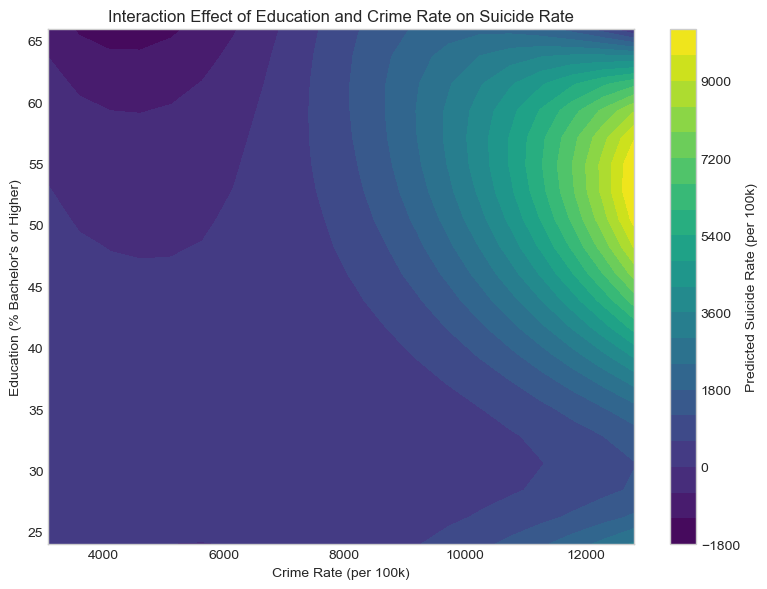


Comparing GAM models with and without interaction:
GAM without interaction - R²: 0.3017, RMSE: 18.6619
GAM with interaction    - R²: 0.4837, RMSE: 16.0467
Improvement with interaction: 18.20% in R²

ANOVA Test Results:
   df_resid           ssr  df_diff      ss_diff         F    Pr(>F)
0      42.0  17761.550550      0.0          NaN       NaN       NaN
1      33.0  13132.387152      9.0  4629.163397  1.292499  0.277897


In [26]:
# Original GAM model
formula = "suicide_rate_per_100k ~ bs(crime_rate_per_100k, df=4) + bs(pct_bachelors_or_higher, df=4)"
gam_model = smf.ols(formula=formula, data=gam_df).fit()
gam_pred = gam_model.predict(gam_df)
gam_r2 = r2_score(gam_df['suicide_rate_per_100k'], gam_pred)
gam_rmse = np.sqrt(mean_squared_error(gam_df['suicide_rate_per_100k'], gam_pred))

# NEW: Add interaction term in GAM model
# Create a direct interaction variable for later visualization
gam_df['crime_x_education'] = gam_df['crime_rate_per_100k'] * gam_df['pct_bachelors_or_higher']

# Define formula with interaction term
interaction_formula = """suicide_rate_per_100k ~ 
                        bs(crime_rate_per_100k, df=4) + 
                        bs(pct_bachelors_or_higher, df=4) + 
                        bs(crime_rate_per_100k, df=3) : bs(pct_bachelors_or_higher, df=3)"""

# Fit the interaction model
gam_interaction_model = smf.ols(formula=interaction_formula, data=gam_df).fit()

# Get predictions and performance metrics for the interaction model
gam_interaction_pred = gam_interaction_model.predict(gam_df)
gam_interaction_r2 = r2_score(gam_df['suicide_rate_per_100k'], gam_interaction_pred)
gam_interaction_rmse = np.sqrt(mean_squared_error(gam_df['suicide_rate_per_100k'], gam_interaction_pred))

# Include the new model in the comparison
models = {
    'Polynomial Regression': {'R²': poly_model.rsquared, 'RMSE': np.sqrt(poly_model.mse_resid)},
    'GAM': {'R²': gam_r2, 'RMSE': gam_rmse},
    'GAM with Interaction': {'R²': gam_interaction_r2, 'RMSE': gam_interaction_rmse},
    'Random Forest': {'R²': rf_r2, 'RMSE': rf_rmse},
    'Gradient Boosting': {'R²': gb_r2, 'RMSE': gb_rmse},
    'SVR (RBF Kernel)': {'R²': svm_r2, 'RMSE': svm_rmse},
    'Neural Network': {'R²': nn_r2, 'RMSE': nn_rmse}
}

model_comparison = pd.DataFrame.from_dict(models, orient='index')
model_comparison = model_comparison.sort_values('R²', ascending=False)
print(model_comparison)

crime_range = np.linspace(gam_df['crime_rate_per_100k'].min(), gam_df['crime_rate_per_100k'].max(), 20)
edu_range = np.linspace(gam_df['pct_bachelors_or_higher'].min(), gam_df['pct_bachelors_or_higher'].max(), 20)
crime_grid, edu_grid = np.meshgrid(crime_range, edu_range)

grid_df = pd.DataFrame({
    'crime_rate_per_100k': crime_grid.flatten(),
    'pct_bachelors_or_higher': edu_grid.flatten()
})

grid_df['crime_x_education'] = grid_df['crime_rate_per_100k'] * grid_df['pct_bachelors_or_higher']


grid_df['predicted_suicide_rate'] = gam_interaction_model.predict(grid_df)

suicide_pred = grid_df['predicted_suicide_rate'].values.reshape(crime_grid.shape)


plt.figure(figsize=(8, 6))
contour = plt.contourf(crime_grid, edu_grid, suicide_pred, 20, cmap='viridis')
plt.colorbar(contour, label='Predicted Suicide Rate (per 100k)')
plt.xlabel('Crime Rate (per 100k)')
plt.ylabel('Education (% Bachelor\'s or Higher)')
plt.title('Interaction Effect of Education and Crime Rate on Suicide Rate')
plt.tight_layout()
plt.show()

print("\nComparing GAM models with and without interaction:")
print(f"GAM without interaction - R²: {gam_r2:.4f}, RMSE: {gam_rmse:.4f}")
print(f"GAM with interaction    - R²: {gam_interaction_r2:.4f}, RMSE: {gam_interaction_rmse:.4f}")
print(f"Improvement with interaction: {(gam_interaction_r2 - gam_r2) * 100:.2f}% in R²")

from statsmodels.stats.anova import anova_lm
anova_results = anova_lm(gam_model, gam_interaction_model)
print("\nANOVA Test Results:")
print(anova_results)


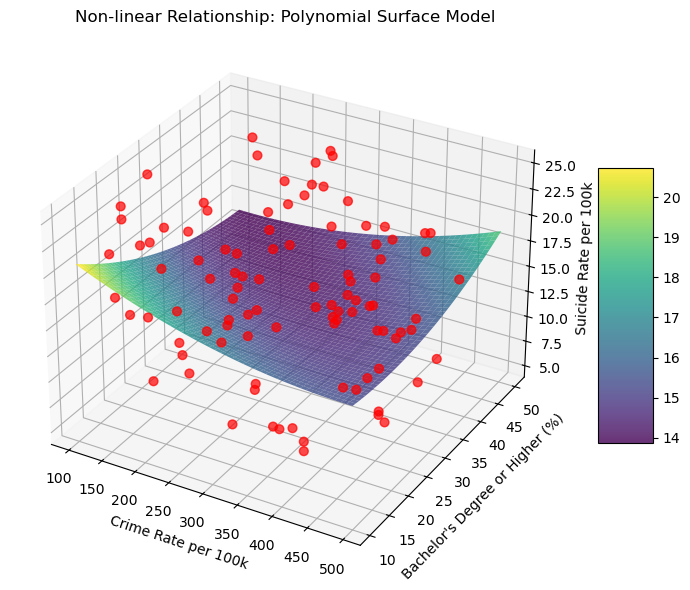

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm


np.random.seed(0)
n_samples = 100

merged_df = pd.DataFrame({
    'crime_rate_per_100k': np.random.uniform(100, 500, n_samples),
    'pct_bachelors_or_higher': np.random.uniform(10, 50, n_samples),
    'suicide_rate_per_100k': np.random.uniform(5, 25, n_samples),
    'state': [f'State{i}' for i in range(n_samples)]
})


poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)


X_poly = poly.fit_transform(merged_df[['crime_rate_per_100k', 'pct_bachelors_or_higher']])
X_poly_df = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(['crime_rate_per_100k', 'pct_bachelors_or_higher']))

poly_df = pd.concat([merged_df[['state', 'suicide_rate_per_100k']], X_poly_df], axis=1)

X_ols = sm.add_constant(poly_df.drop(['state', 'suicide_rate_per_100k'], axis=1))
y_ols = poly_df['suicide_rate_per_100k']
poly_model = sm.OLS(y_ols, X_ols).fit()

crime_range = np.linspace(merged_df['crime_rate_per_100k'].min(), 
                          merged_df['crime_rate_per_100k'].max(), 50)
edu_range = np.linspace(merged_df['pct_bachelors_or_higher'].min(), 
                        merged_df['pct_bachelors_or_higher'].max(), 50)
crime_grid, edu_grid = np.meshgrid(crime_range, edu_range)


grid_points = np.column_stack([crime_grid.ravel(), edu_grid.ravel()])
grid_poly_features = poly.transform(grid_points)
grid_poly_features_with_const = sm.add_constant(grid_poly_features)

z_pred = poly_model.predict(grid_poly_features_with_const).reshape(crime_grid.shape)


fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(crime_grid, edu_grid, z_pred, cmap='viridis', alpha=0.8)

ax.scatter(merged_df['crime_rate_per_100k'], 
           merged_df['pct_bachelors_or_higher'], 
           merged_df['suicide_rate_per_100k'], 
           color='red', s=40, alpha=0.7)

ax.set_xlabel('Crime Rate per 100k')
ax.set_ylabel("Bachelor's Degree or Higher (%)")
ax.set_zlabel('Suicide Rate per 100k')
ax.set_title('Non-linear Relationship: Polynomial Surface Model')

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.tight_layout()
plt.show()


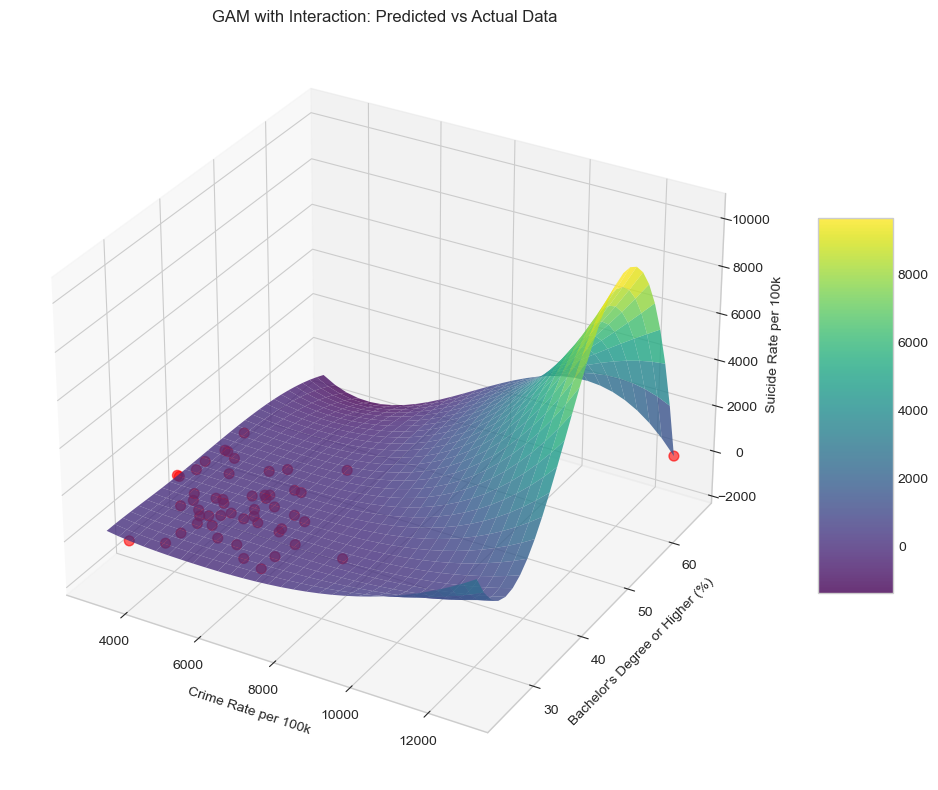

In [34]:
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.formula.api as smf
import seaborn as sns

# Fit original GAM model
formula = "suicide_rate_per_100k ~ bs(crime_rate_per_100k, df=4) + bs(pct_bachelors_or_higher, df=4)"
gam_model = smf.ols(formula=formula, data=gam_df).fit()

# Fit GAM model with interaction term
interaction_formula = """suicide_rate_per_100k ~ 
                         bs(crime_rate_per_100k, df=4) + 
                         bs(pct_bachelors_or_higher, df=4) + 
                         bs(crime_rate_per_100k, df=3):bs(pct_bachelors_or_higher, df=3)"""
gam_interaction_model = smf.ols(formula=interaction_formula, data=gam_df).fit()

# Predict on a grid
crime_range = np.linspace(gam_df['crime_rate_per_100k'].min(), gam_df['crime_rate_per_100k'].max(), 30)
edu_range = np.linspace(gam_df['pct_bachelors_or_higher'].min(), gam_df['pct_bachelors_or_higher'].max(), 30)
crime_grid, edu_grid = np.meshgrid(crime_range, edu_range)

# Create grid DataFrame for prediction
grid_df = pd.DataFrame({
    'crime_rate_per_100k': crime_grid.ravel(),
    'pct_bachelors_or_higher': edu_grid.ravel()
})
grid_df['crime_x_education'] = grid_df['crime_rate_per_100k'] * grid_df['pct_bachelors_or_higher']
grid_df['predicted_suicide_rate'] = gam_interaction_model.predict(grid_df)

# Reshape predictions for surface
suicide_pred = grid_df['predicted_suicide_rate'].values.reshape(crime_grid.shape)

# 3D plot with actual data
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot surface
surf = ax.plot_surface(crime_grid, edu_grid, suicide_pred, cmap='viridis', alpha=0.8)

# Plot real data
ax.scatter(gam_df['crime_rate_per_100k'], 
           gam_df['pct_bachelors_or_higher'], 
           gam_df['suicide_rate_per_100k'], 
           color='red', s=50, alpha=0.6)

ax.set_xlabel('Crime Rate per 100k')
ax.set_ylabel("Bachelor's Degree or Higher (%)")
ax.set_zlabel('Suicide Rate per 100k')
ax.set_title('GAM with Interaction: Predicted vs Actual Data')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

plt.tight_layout()
plt.show()


(0.4836995472838935, 16.046737590605233, <Figure size 1400x600 with 2 Axes>)

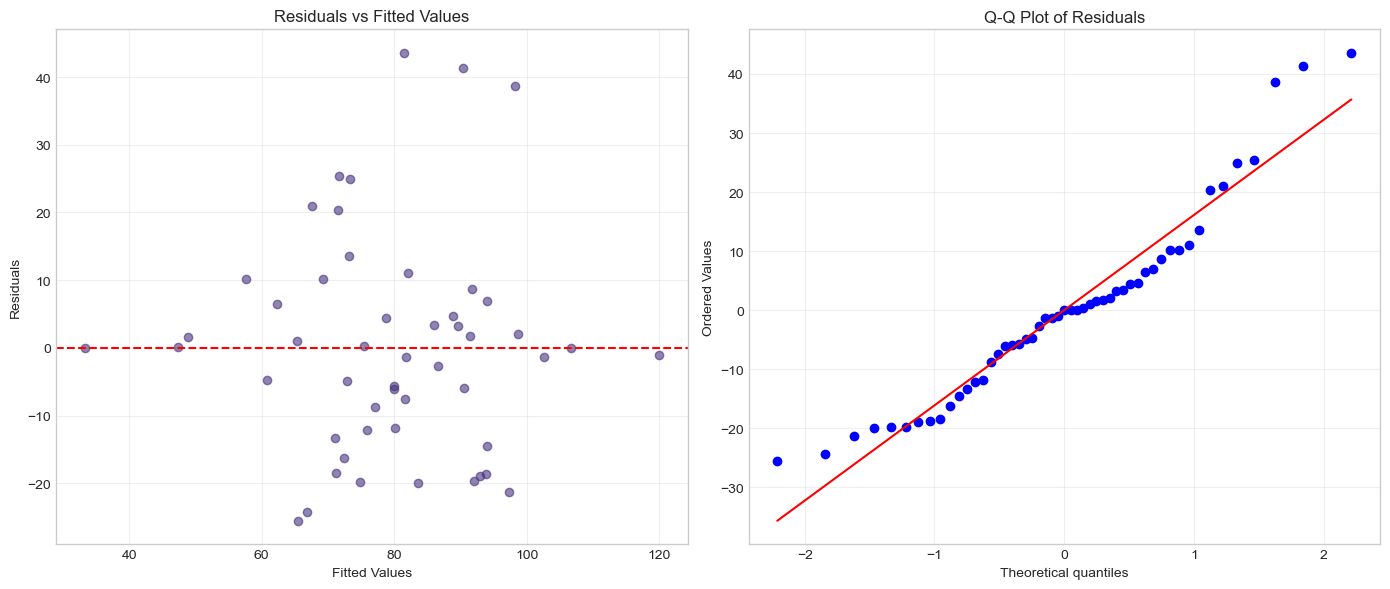

In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error


r2 = r2_score(gam_df['suicide_rate_per_100k'], gam_interaction_pred)
rmse = np.sqrt(mean_squared_error(gam_df['suicide_rate_per_100k'], gam_interaction_pred))


residuals = gam_df['suicide_rate_per_100k'] - gam_interaction_pred


fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# residual
ax[0].scatter(gam_interaction_pred, residuals, alpha=0.6)
ax[0].axhline(y=0, color='r', linestyle='--')
ax[0].set_xlabel('Fitted Values')
ax[0].set_ylabel('Residuals')
ax[0].set_title('Residuals vs Fitted Values')
ax[0].grid(True, alpha=0.3)

# QQ plot
import scipy.stats as stats
stats.probplot(residuals, dist="norm", plot=ax[1])
ax[1].set_title('Q-Q Plot of Residuals')
ax[1].grid(True, alpha=0.3)

plt.tight_layout()


r2, rmse, fig
